In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'astrafy-thc' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [8]:
# Query our staging table to get the number of transactions per day and store into a dataframe
%%bigquery --project astrafy-thc df
SELECT CAST(staging_table.block_timestamp as DATE) as date, COUNT(*) as number_of_transactions
FROM `astrafy-thc.dbt_nawfelbc.staging_table` as staging_table
GROUP BY 1
ORDER BY 1

In [9]:
# Print the first 5 rows of the dataframe
df.head()

,date,number_of_transactions
0,2022-07-28,34727
1,2022-07-29,34637
2,2022-07-30,31186
3,2022-07-31,30726
4,2022-08-01,31639


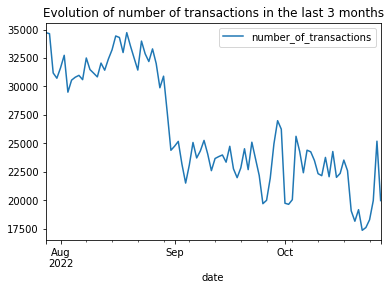

In [10]:
import pandas as pd
# Plot the graph
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'],inplace=True)
df.plot(title='Evolution of number of transactions in the last 3 months')